<a href="https://colab.research.google.com/github/EddyGiusepe/Perceptron_with_Python/blob/main/The_Perceptron_Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">O Perceptron: Métricas para Classificação Binâria</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Nosso Dataset: MNIST

Este Dataset, [MNIST](http://yann.lecun.com/exdb/mnist/), foi elaborado com o objetivo de treinar modelos automáticos de OCR (Optical Character Recognition) para poder acelerar o trabalho de classificação de correio a partir do código postal escrito. Está formado por $70000$ imagens de dígitos manuscritos, entre $0$ e $9$, nosso objetivo é identificar (classificar) uma imagem (dizer que número é) diretamente a partir de seus pixeis. Para descarregar estes Dados vamos a utilizar [Scikit-Learn](https://scikit-learn.org/stable/).

In [1]:
# As nossas bibliotecas

from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import random

In [2]:

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

X.shape, y.shape # 784 características

((70000, 784), (70000,))

Cada imagem está formada por $784$ características (os pixeis). Podemos visualizar umas quantas imagens com suas respectivas etiquetas (labels), para ter uma ideia do tipo de Dados que temos: 

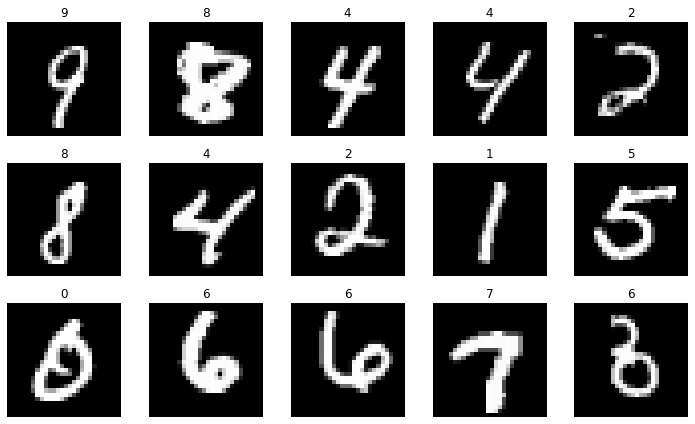

In [4]:
# Ver link: https://stackoverflow.com/questions/71270651/issue-reshaping-an-array-into-28-28-for-an-mnist-image


r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))

for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        img = X.loc[[ix]].to_numpy()
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(y[ix])
plt.tight_layout()
plt.show()

Vamos a extrair $60000$ imagens para treinar nosso modelo, $10000$ para avaliação e calcular as diferentes métricas que implementaremos depois.

In [5]:
X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000], y[60000:]


​☀️​💡​ Lembra que para um melhor aprendizado de nosso modelo é necessário normalizar os Dados que usaremos como entradas. Neste caso cada pixel está representado por um valor inteiro entre $0 - 255$, pelo que ao dividir cada imagem por $255$ teremos nossos valores no intervalo entre $0 - 1$.

# Treinando um classificador Binârio

Para realizar esta task precisamos que nosso Dataset esteja dividido em dois classes, no entanto o Dataset MNIST, tem $10$ classes (dígitos entre $0$ e $9$). Neste caso vamos treinar um modelo para classificar as imagens com o número $5$ do resto.

In [6]:

y_train_5 = (y_train == '5').astype(np.int)

y_test_5 = (y_test == '5').astype(np.int)


Agora podemos usar o modelo de `Regressão Logística` que implementamos no script anterior. Neste caso trocamos o esquema de inicialização dos pesos, utilizando uma DISTRIBUIÇÃO NORMAL ESCALADA pelo número de pesos.Também adicionamos um print para ver como vai evolucionando o modelo durante o treinamento, visualizando o valor da LOSS FUNCTION em cada epoch.

In [7]:
def bce(y, y_hat):
    return - np.mean(y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat))

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

class Perceptron():
  def __init__(self, size):
    self.w = np.random.normal(loc=0.0, # Distribuição de probabilidade Normal
          scale = np.sqrt(2/(size+1)), # size --> Número de neurônios em nosso Perceptron
          size = (size, )) 
    self.ws = []
    self.activation = sigmoid
    self.loss = bce
    
  def __call__(self, w, x):
    return self.activation(np.dot(x, w)) 

  def fit(self, x, y, epochs, lr, verbose=True):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(1,epochs+1):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # Função de Perda
        l = self.loss(y, y_hat)
        # Derivadas
        dldh = (y_hat - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # Atualizar Pesos
        self.w = self.w - lr*dldw
        # Salvar os pesos para a Animação
        self.ws.append(self.w.copy())
        # Print da LOSS
        if verbose:
            print(f"Epoch {epoch}/{epochs} Loss {l}")

In [8]:
np.random.seed(42) # Para que nos dei sempre o mesmo resultado

perceptron = Perceptron(X.shape[1] + 1)
epochs, lr = 20, 1e-5
perceptron.fit(X_train, y_train_5, epochs, lr)

Epoch 1/20 Loss -0.5548410142855105
Epoch 2/20 Loss 0.7206598224991427
Epoch 3/20 Loss 0.5304482677090414
Epoch 4/20 Loss 0.3387412138758039
Epoch 5/20 Loss 0.14817873671774645
Epoch 6/20 Loss 0.02999051884537082
Epoch 7/20 Loss 0.07018573941348852
Epoch 8/20 Loss 0.03957115693418076
Epoch 9/20 Loss 0.053798900444024085
Epoch 10/20 Loss 0.0419895655402817
Epoch 11/20 Loss 0.04634619050752581
Epoch 12/20 Loss 0.041700388831850364
Epoch 13/20 Loss 0.04249345232272722
Epoch 14/20 Loss 0.04051560447638476
Epoch 15/20 Loss 0.040218266715440924
Epoch 16/20 Loss 0.039198805829896884
Epoch 17/20 Loss 0.03867201099357209
Epoch 18/20 Loss 0.03801039413850561
Epoch 19/20 Loss 0.037502744090907016
Epoch 20/20 Loss 0.03700103180387198


Atá aqui já treinamos nosso modelo. Agora, como podemos avaliar nosso modelo? É um modelo bom ou ruim? se treinamos outro modelo, como podemos saber se é melhor o pior que o primeiro? 

Vamos responder estas perguntas com as `Métricas de Desempenho`.

# Métricas

Aqui estudaremos as métricas mais utilizadas na avaliação de modelos de classificação binâria.

In [9]:
def evaluate(perceptron, x, t = 0.5): # Threshold = 0.5 (Default)
    w = perceptron.ws[-1] # Extrai os últimos pesos do Perceptron (da última epoch)
    x = np.c_[np.ones(len(x)), x] # Adiciona uma coluna de "1" para fazer o produto escalar
    y = perceptron(w, x) 
    return (y > t).astype(np.int)

## Accuracy (ou precisão)

Nesta métrica simplesmente contabilizamos todos os elementos do Dataset que nosso modelo a sido capaz de CLASSIFICAR CORRETAMENTE e o dividimos pelo número total de elementos. Isto implica que a precisão será um valor entre $0$ e $1$, significando: $0$ que nosso modelo não acertou nenhum resultado e $1$ que acertou todos. Também é comum dar este valor em porcentagem. 

In [10]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)
    

In [11]:
y_pred = evaluate(perceptron, X_train)

accuracy(y_pred, y_train_5)

0.9371

In [12]:
y_pred = evaluate(perceptron, X_test)

accuracy(y_pred, y_test_5)

0.9412

Como podemos observar nosso modelo tem uma precisão aprox. de $94\%$ tanto para o conjunto de treinamento como para o conjunto de teste (avaliação). <font color="yellow">Este é um bom modelo?</font> A priori poderíamos pensar que sim, já que nosso modelo acerta $9$ de cada $10$ imagens ... No entanto, a realidade é que nosso modelo não está fazendo praticamente nada. Vamos ver! ... Estamos contruíndo um modelo para classificação binâria para detectar o número $5$. Quantas imagens diferentes de $5$ temos em nosso Dataset?  

In [17]:
1 - y_train_5.mean(), 1 - y_test_5.mean()

(0.90965, 0.9108)

Aqui temos a resposta, nosso Dataset está formado num $91\%$ por imagens que não são $5$. Isto significa que um modelo naive que sempre diga que NÃO temos um $5$ vai ter uma ACCURACY do $91\%$. No entanto, no mundo real, nunca detectaremos este dígito e nossa aplicação falhará drasticamente. Nosso modelo tem uma precisão do $94\%$, melhorando ligeiramente este valor porém não por muito.  

Como pode observar a MÉTRICA DE PRECISÃO é muito útil porém pode levar a erro. Isto se faz geralmente em aplicações nas que temos muito poucas amostras da classe que queremos capturar. 

<font color="orange">Um exemplo claro:</font> é a detecção de transações bancárias fraudulentas, que representam perto do $0.001\%$ do total de operações realizadas. Um modelo de classificação binâria que sempre dá como resultado que uma transação NÃO é fraudulenta teria uma precisão do $99.999\%$, não entanto, seria um modelo totalmente inútil no mundo real.  

<font color="yellow">Sempre é recomendável ter umas métricas `baseline` com as que possamos comparar nossos modelos. Estas métricas podem ser obtidas com um modelo aleatório (antes de ser treinado) ou no caso de classificação podemos utilizar diretamente a distribuição de classes no Dataset. Qualquer modelo que façamos deveria melhorar estas métricas.</font>

In [74]:
perceptron = Perceptron(X.shape[1] + 1)
epochs, lr = 600, 1e-5

perceptron.fit(X_train, y_train_5, epochs, lr, verbose=False)

y_pred = evaluate(perceptron, X_test)

accuracy(y_pred, y_test_5)

0.972

As métricas que vamos a usar estão implementadas na biblioteca `Scikit Learn`, pelo que é recomendado usar ela para evitar errores na implementação.

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_5, y_pred)

0.972

# Matriz de confusão

A matriz de confusão nos vai a indicar quais são os pontos fortes e fracos de nosso Classificador. Para cada classe, vamos a calcular quantos elementos han sido bem classificados por nosso modelo e quantos han sido confundidos com outras classes (esta matriz nos será muito útil na classificação em várias classes também).

In [76]:
TP = np.sum((y_pred == 1) & (y_test_5 == 1)) 
TN = np.sum((y_pred == 0) & (y_test_5 == 0)) 
FP = np.sum((y_pred == 1) & (y_test_5 == 0))
FN = np.sum((y_pred == 0) & (y_test_5 == 1))

CM = [[TN, FP],
      [FN, TP]]
CM

[[9039, 69], [211, 681]]

En esta matriz podemos observar:
    
- `Verdadeiros Positivos (TP, *True Positives*)`: elementos que nosso modelo clasifica corretamente como a classe que nos interessa, a clase positiva (fila 1, columna 1).

- `Verdaderos Negativos (TN, *True Negatives*)`: elementos que nosso modelo clasifica corretamente como a classe negativa (fila 0, columna 0).

- `Falsos Positivos (FP, *False Positives*)`: elementos que nosso modelo clasifica erroneamente como a classe positiva (fila 0, columna 1).

- `Falsos Negativos (FN, *False Negatives*)`: elementos que nosso modelo clasifica erroneamente como a classe negativa (fila 1, columna 0).

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_5, y_pred)

array([[9039,   69],
       [ 211,  681]])

💡 Uma vez visto os conceitos definidos  neste apartado podemos reescrever a `accuracy` como:

 $ accuracy = \frac{TP + TN}{TP+TN+FP+FN} $

# Precision e Recall

In [79]:
def precision(y_pred, y):
    TP = np.sum((y_pred == 1) & (y == 1)) 
    FP = np.sum((y_pred == 1) & (y == 0))
    return TP / (TP + FP)

def recall(y_pred, y):
    TP = np.sum((y_pred == 1) & (y == 1)) 
    FN = np.sum((y_pred == 0) & (y == 1))
    return TP / (TP + FN)


In [82]:
y_pred = evaluate(perceptron, X_test)

print("Temos a Precision: ", precision(y_pred, y_test_5))
print("")
print("Temos a Recall: ", recall(y_pred, y_test_5))

Temos a Precision:  0.908

Temos a Recall:  0.7634529147982063


In [83]:
# Também

from sklearn.metrics import precision_score, recall_score

precision_score(y_test_5, y_pred), recall_score(y_test_5, y_pred)


(0.908, 0.7634529147982063)

Dependendo da aplicação que estemos trabalhando vamos querer otimizar uma métrica u outra. Em aplicações nas que ter FALSOS POSITIVOS seja prejudicial (<font color="orange">por exemplo, aplicações de SEGURANÇA</font>) queremos modelos com boa PRECISION, enquanto que em aplicações nas que ter FALSOS NEGATIVOS seja prejudicial (<font color="orange">por exemplo, sistemas de Diagnóstico Médico</font>) queremos modelos com boa RECALL. Uma vez que nosso modelo a sido treinado, podemos ajustar estas métricas variando o valor do `THRESHOLD` utilizado na avaliação. A isto se conhece como `PRECISION-RECALL trade off`.

In [84]:
for t in np.linspace(0.1,0.9,20):
    y_pred = evaluate(perceptron, X_test, t)
    print(f"Threshold: {t:.3f} Precision {precision(y_pred, y_test_5):.4f} Recall {recall(y_pred, y_test_5):.4f}")

Threshold: 0.100 Precision 0.5416 Recall 0.9193
Threshold: 0.142 Precision 0.6246 Recall 0.9047
Threshold: 0.184 Precision 0.6910 Recall 0.8901
Threshold: 0.226 Precision 0.7455 Recall 0.8733
Threshold: 0.268 Precision 0.7851 Recall 0.8599
Threshold: 0.311 Precision 0.8237 Recall 0.8430
Threshold: 0.353 Precision 0.8405 Recall 0.8274
Threshold: 0.395 Precision 0.8612 Recall 0.8072
Threshold: 0.437 Precision 0.8883 Recall 0.7937
Threshold: 0.479 Precision 0.9009 Recall 0.7747
Threshold: 0.521 Precision 0.9146 Recall 0.7444
Threshold: 0.563 Precision 0.9272 Recall 0.7287
Threshold: 0.605 Precision 0.9351 Recall 0.6951
Threshold: 0.647 Precision 0.9521 Recall 0.6682
Threshold: 0.689 Precision 0.9630 Recall 0.6413
Threshold: 0.732 Precision 0.9661 Recall 0.6076
Threshold: 0.774 Precision 0.9757 Recall 0.5841
Threshold: 0.816 Precision 0.9755 Recall 0.5348
Threshold: 0.858 Precision 0.9863 Recall 0.4832
Threshold: 0.900 Precision 0.9863 Recall 0.4036


Como podemos observa, incrementar o valor de uma das métricas implica que a outra vai diminuir (é por isso que se chama `trade-off` já que temos que chegar a um compromisso). Assim, escolheremos um valor do `threshold` que se ajuste aos critérios de desenho de nossa aplicação em particular (em função da quantidade de FALSOS POSITIVOS e FALSOS NEGATIVOS que estejamos dispostos a assumir).

![](https://wizardforcel.gitbooks.io/scikit-and-tensorflow-workbooks-bjpcjp/pics/decision-threshold-and-precision-vs-recall.png)

# F1-Score

É uma boa métrica que nos vai dizer se nosso modelo tem uma boa PRECISION e RECALL é esta métrica, **F1-score**.

$$  F_1 = 2 \times \frac{precision \times recall}{precision + recall} $$




In [86]:
y_pred = evaluate(perceptron, X_test)

p = precision_score(y_test_5, y_pred)

r = recall_score(y_test_5, y_pred)

f1 = 2*(p*r)/(p+r)

print("A minha F1-score, é: ", f1)

A minha F1-score, é:  0.8294762484774665


In [87]:
# Também:

from sklearn.metrics import f1_score

f1_score(y_test_5, y_pred)

0.8294762484774665

# Curva ROC-AUC

Podemos visualizar rapidamente o comportamento de um modelo para vários `threshold` com a chamada curva ROC (Receiver Operating Characteristic). Nela representamos o ratio de Verdadeiros Positivos (TPR) contra o ratio de Falsos Positivos (FPR), definidos da seguinte maneira:


$$ TPR = \frac{TP}{TP+FN} $$

$$ FPR = \frac{FP}{FP+TN} $$

In [89]:
def evaluate2(perceptron, x):
  w = perceptron.ws[-1]
  x = np.c_[np.ones(len(x)), x]
  y = perceptron(w, x)
  return y

In [90]:
from sklearn.metrics import roc_curve

y_pred2 = evaluate2(perceptron, X_test)

fpr, tpr, thresholds = roc_curve(y_test_5, y_pred2)

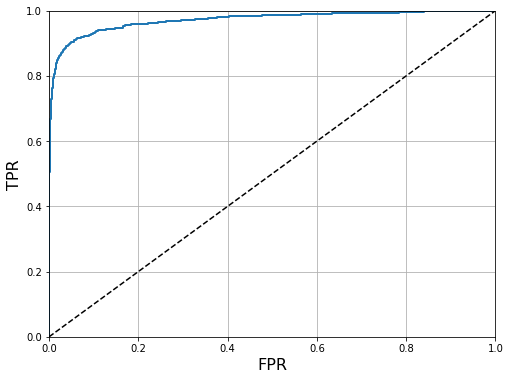

In [91]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('FPR', fontsize=16) 
    plt.ylabel('TPR', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)              
plt.show()

Uma métrica muito utilizada para comparar classificadores é a área sob a curva ROC, já que nos indica quão robusto é um modelo. A linha reta representa um modelo `naive` que podemos usar como `baseline`. Este modelo tem uma área de 0.5, pelo que qualquer modelo que façamos deveria superar este valor. Quanto mais perto, a curva, à esquina superior esquerda, maior será a área e melhor será o modelo.

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_5, y_pred2)

0.9715079484649576